# Lab session week 3: Scikit-Image

This week you will learn some computer vision techniques that you will use in the final assignment of this course to gather features from a data set of images.

Most of the information is covered in this weeks slides. Please write code for the following exercises:

In [1]:
import numpy as np
import skimage
from skimage import io
import matplotlib
import matplotlib.pyplot as plt
import os


def display(np_image):
    """
    This is a display function that we have added to show numpy images at full size
    If you pass in an image with 3 channels, it will be displayed in RGB
    If you passn in an image with 1 channel, it will be displayed in grayscale
    """
    dpi = matplotlib.rcParams['figure.dpi']
    if len(np_image.shape) == 3:
        height, width, depth = np_image.shape
    else:
        height, width = np_image.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')
    
    # Display the image in either RGB or grayscale (depending on the amount of dimensions)
    if (len(np_image.shape) >= 3):
        ax.imshow(np_image)
    else:
        ax.imshow(np_image, cmap='gray')

    plt.show()

## Exercise 1: Where's (scary) Wally
Where's Wally? is a British series of children's puzzle books. The books consist of a series of detailed double-page spread illustrations depicting dozens or more people doing a variety of amusing things at a given location. Readers must find a character named Wally hidden in the group.

In this exercise you will see a cropped version of one of those puzzles: scary Wally. This image has been cut out of the original puzzle and several computer vision operation have been applied to it. 

The goal of this assignment is:
- Find Wally **by hand** in the large image
- Cut Wally out of the original image
- Apply the same transformations that have been applied to scary Wally in order to create exactly the same image

Are you able to find Wally and achieve the exact same result as scary Wally?

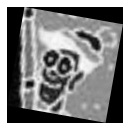

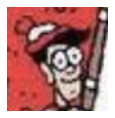

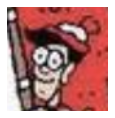

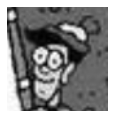

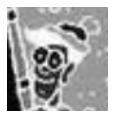

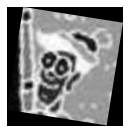

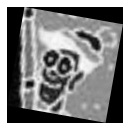

In [45]:
scary = io.imread(os.path.join('dataset_week3', 'scaryWally.jpg'))
display(scary)

orig = io.imread(os.path.join('dataset_week3', 'wally_orig.jpg'))
# display(orig)

# Scale the image
scaled = skimage.transform.rescale(orig, 1.3)
display(scaled)

# Flip the image horizontally
flipped = scaled[:, ::-1]
display(flipped)

# Make the image grayscale
grayscale = skimage.color.rgb2gray(flipped)
display(grayscale)

# Invert the image colors
inverted = skimage.util.invert(grayscale)
display(inverted)

# Rotate the image
rotated = skimage.transform.rotate(inverted, -9, resize=True)
display(rotated)

# Show the original again for comparison
display(scary)

## Exercise 2: Changing colors
Anthony van den Berg recently bought a Ferrari. He has been driving the car for a couple of months now, but somehow he is not so happy with the color of the car. Luckily when he is driving the car he can't see the color, but everytime he looks at a picture of the car he gets annoyed. Can you help him out and write a function that changes the yellow ferrari into a red one?

**Hints:**
- There are colorspaces that could be suitable for changing colors
- Displaying images is only possible in RGB

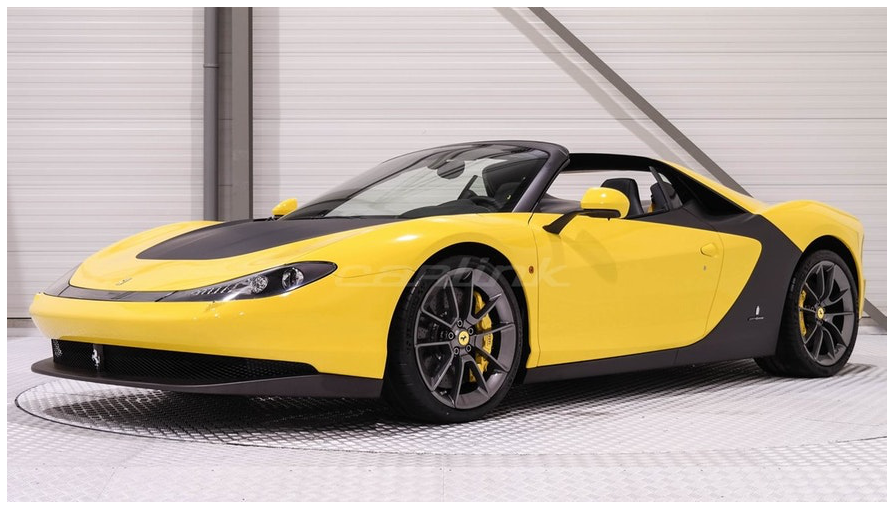

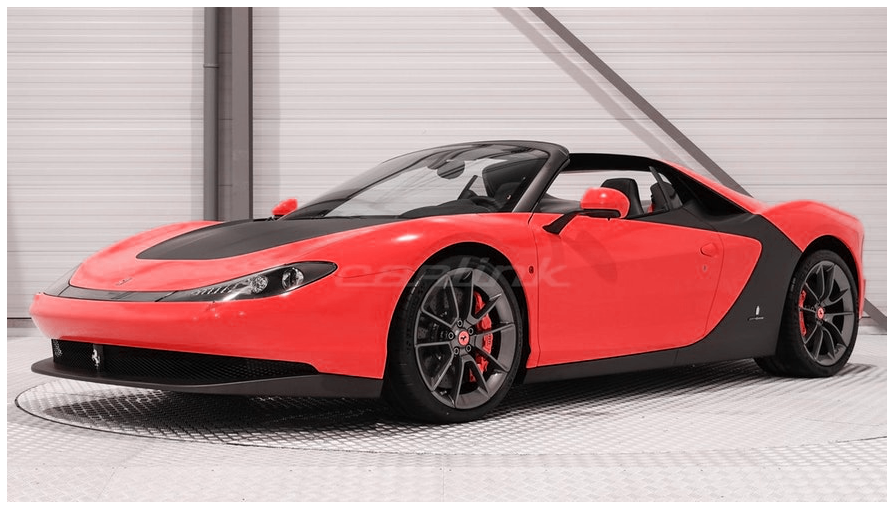

In [113]:
img = io.imread(os.path.join('dataset_week3', 'ferrari.jpg'))
display(img)

hsv_colorspace = skimage.color.rgb2hsv(img)

for hor in hsv_colorspace:
    for vert in hor:
        vert[0] = 0

rgb_img = skimage.color.hsv2rgb(hsv_colorspace)
display(rgb_img)

## Exercise 3: Counting money
In this exercise you will build an algorithm that is able to count (and sum) euros. The ```simple``` folder contains 25 images of euro coins in different positions and different rotations. It is your goal to write an algorithm that analyzes the image and tells us how much money is displayed in the image.

We also provided the ```simple_totals.csv``` file. This file contains the amounts for each of the images. Please use this file to check if your algorithm works correctly.

**How to approach this problem?**
1. Use Scikit-Image to load an image
2. Use filters to make the image suitable for binarization
3. Binarize the image and apply morphological operations to fill holes and remove noise
4. Label the image (create blobs)
5. Collect features from the labels
6. Write logic (based on the features) to classify each coin
7. Combine everything into a function, so that you can predict the total amount of money on each image

**Hints:**
- The scaling factor on all the images is the same: each type of coin has exactly the same dimensions in every image.
- There are no differences in contrast and brightness between images
- You don't need any machine learning algorithms for this problem, just simple if-statements will do.

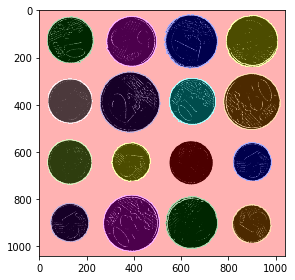

image 0 correct


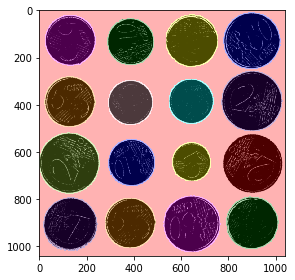

image 1 correct


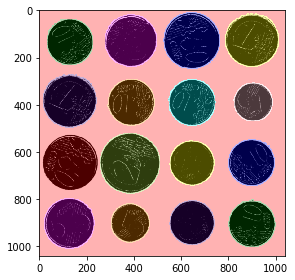

image 2 correct


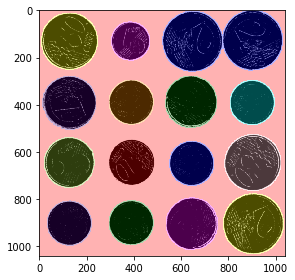

image 3 correct


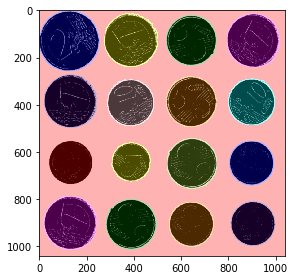

image 4 correct


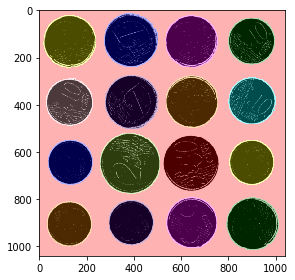

image 5 correct


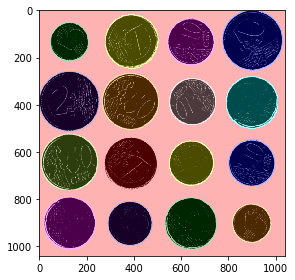

image 6 correct


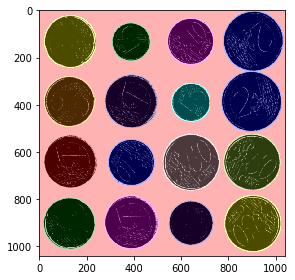

image 7 correct


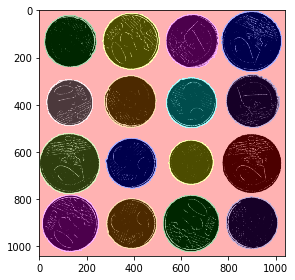

image 8 correct


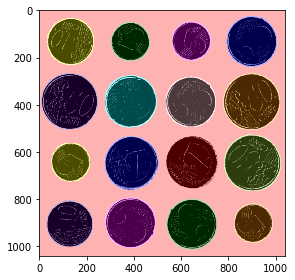

image 9 correct


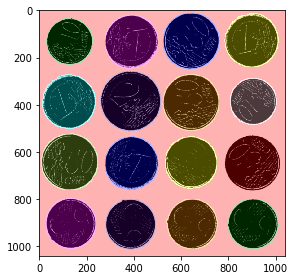

image 10 correct


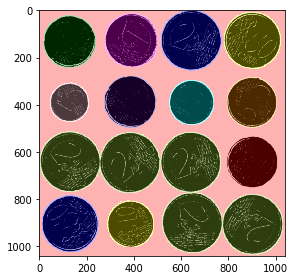

image 11 correct


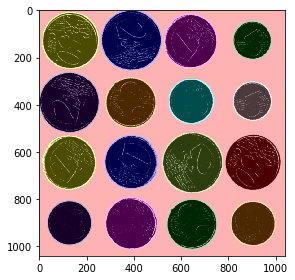

image 12 correct


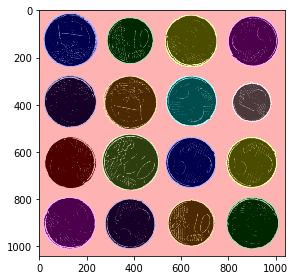

image 13 correct


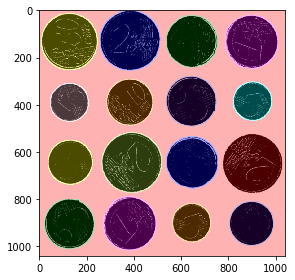

image 14 correct


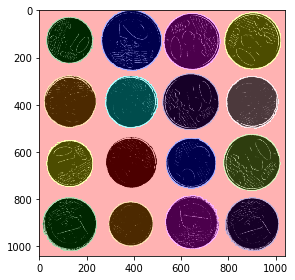

image 15 correct


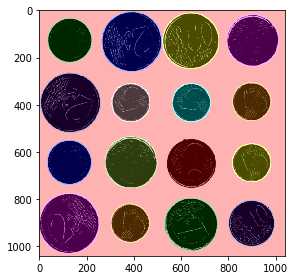

image 16 correct


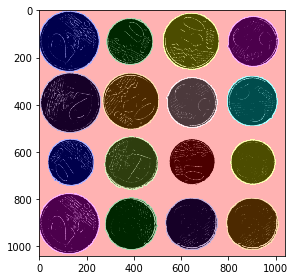

image 17 correct


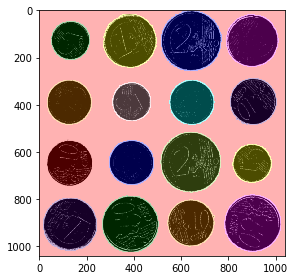

image 18 correct


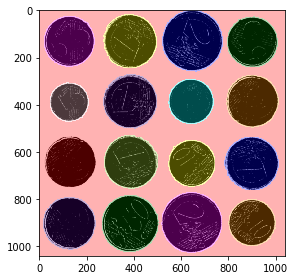

image 19 correct


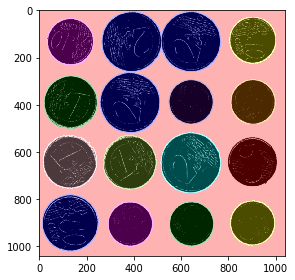

image 20 correct


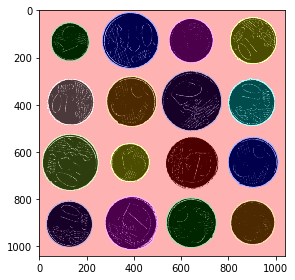

image 21 correct


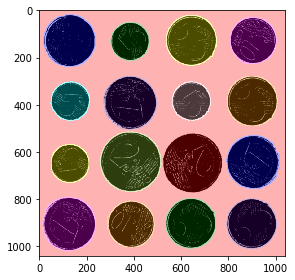

image 22 correct


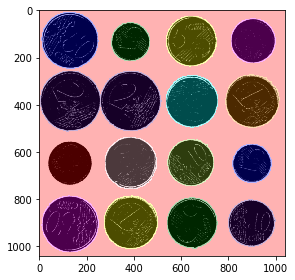

image 23 correct


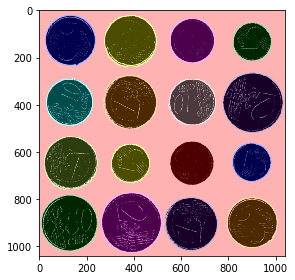

image 24 correct


In [2]:
from skimage import filters, data, io, morphology, measure, color

def read_areas(image):
    # Define a threshold
    threshold = filters.threshold_isodata(image)
    
    # Create a binary image with the given threshold
    binary = image > threshold
    
    # Use a gaussian filter to smooth the edges
    gaussian_binary = filters.gaussian(binary)
    
    # Get labels from the gaussian image, providing the background color
    # to ensure it returns the coins instead of the background
    label_image = measure.label(gaussian_binary, background=1)
    
    # Create an overlay for the image and show it
    overlay = color.label2rgb(label_image, image=gaussian_binary)
    io.imshow(overlay)
    plt.show()
    
    # Create an empty array for all areas
    areas = []
    
    # For every found region, add its area to the array
    for region in measure.regionprops(label_image):
        areas.append(region.area)
    
    # Return the array of areas
    return areas

# Get the worth from an area
def value_from_area(area):
    if area > 21500 and area < 22500:
        return 0.01
    if area > 28500 and area < 29500:
        return 0.02
    if area > 36000 and area < 37500:
        return 0.05
    if area > 31000 and area < 32000:
        return 0.10
    if area > 39000 and area < 40000:
        return 0.20
    if area > 45500 and area < 46500:
        return 0.50
    if area > 41000 and area < 42000:
        return 1.00
    if area > 52000 and area < 53000:
        return 2.00
    if area > 100000:
        return 2 * round(area / 50000, 0)
    
    return -100
    
# Get the total worth from all areas
def total_from_image(image):
    areas = read_areas(image)
    total = 0
    for area in areas:
        total += value_from_area(area)
    
    return round(total, 2)

# Get an image (in grayscale) from the data folder with the given name
def get_image(i):
    return io.imread(os.path.join('dataset_week3/simple', str(i) + '.png'), as_gray=True)

# Read the total amount of money of all of the images
outcomes = np.genfromtxt(os.path.join('dataset_week3/', 'simple_totals.csv'))

# For each int from 0 - 24 (inclusive)
for i in range(0,25):
    # Get the image from the data folder
    image = get_image(i)
    
    # Calculate the total worth of all coins in the image
    estimated_total = total_from_image(image)
    
    # Compare the calculated total worth with the correct answer
    print("image " + str(i) + (" correct" if estimated_total == outcomes[i] else " error"))

